# Desmosomes and their distances to various organelles

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

## Journal wants a sans serif font
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

## Make exported plots' text seen as text in Illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
df = pd.read_csv("../csv/2023-01-21_DSM-3_tile2-2_filtered_distances_with_N_radial_KRT.csv",
                 usecols = ["Label Index",
                            "Name",
                            "N-sides-with-radial-keratin-filaments",
                            "Volume (nm³)",
                            "Min Intensity (Distance_Map-ER_R)",
                            "Min Intensity (Distance_Map-ER_L)",
                            "Min Intensity (Distance_Map-KRT_R)",
                            "Min Intensity (Distance_Map-KRT_L)",
                            "Min Intensity (Distance_Map-MT_R)",
                            "Min Intensity (Distance_Map-MT_L)",
                            "Min Intensity (Distance_Map-endo_R)",
                            "Min Intensity (Distance_Map-endo_L)"
                          ]
                )

df.head()

,Label Index,Name,N-sides-with-radial-keratin-filaments,Volume (nm³),Min Intensity (Distance_Map-ER_R),Min Intensity (Distance_Map-ER_L),Min Intensity (Distance_Map-KRT_R),Min Intensity (Distance_Map-KRT_L),Min Intensity (Distance_Map-MT_R),Min Intensity (Distance_Map-MT_L),Min Intensity (Distance_Map-endo_R),Min Intensity (Distance_Map-endo_L)
0,1,DSM3_tile2-2_01,0,1014144,4.000000e-09,1.200000e-07,1.220000e-07,4.970000e-07,2.220000e-07,9.410000e-07,5.180000e-07,1.380000e-07
1,2,DSM3_tile2-2_02,1,2637696,2.600000e-07,4.630000e-08,1.080000e-06,4.000000e-09,1.060000e-06,1.690000e-07,1.300000e-06,7.980000e-08
2,3,DSM3_tile2-2_03,2,3486720,1.500000e-08,2.860000e-08,4.000000e-09,5.660000e-09,8.450000e-07,2.660000e-07,5.400000e-08,2.940000e-07
3,4,DSM3_tile2-2_04,2,3349760,1.220000e-07,1.200000e-08,8.940000e-09,1.200000e-08,6.540000e-07,3.940000e-07,2.860000e-07,1.620000e-07
4,5,DSM3_tile2-2_05,2,6841344,4.000000e-09,6.030000e-08,4.630000e-08,4.000000e-09,1.020000e-06,2.320000e-07,7.650000e-07,4.010000e-07


In [3]:
NANOMETERS_IN_METERS = 1e9
voxel_size_in_nm = 4
distance_columns = list(df.filter(regex = '^Min'))

for col in distance_columns:
    df[col] = df[col] * NANOMETERS_IN_METERS
    
df.rename(columns = {"Label Index" : "Desmosome",
                     "Min Intensity (Distance_Map-ER_R)"   : "Distance_to_ER-R [nm]",
                     "Min Intensity (Distance_Map-ER_L)"   : "Distance_to_ER-L [nm]",
                     "Min Intensity (Distance_Map-KRT_R)"  : "Distance_to_KRT-R [nm]",
                     "Min Intensity (Distance_Map-KRT_L)"  : "Distance_to_KRT-L [nm]",
                     "Min Intensity (Distance_Map-MT_R)"   : "Distance_to_MT-R [nm]",
                     "Min Intensity (Distance_Map-MT_L)"   : "Distance_to_MT-L [nm]",
                     "Min Intensity (Distance_Map-endo_R)" : "Distance_to_endo-R [nm]",
                     "Min Intensity (Distance_Map-endo_L)" : "Distance_to_endo-L [nm]",
                    },
          inplace = True
         )

df

,Desmosome,Name,N-sides-with-radial-keratin-filaments,Volume (nm³),Distance_to_ER-R [nm],Distance_to_ER-L [nm],Distance_to_KRT-R [nm],Distance_to_KRT-L [nm],Distance_to_MT-R [nm],Distance_to_MT-L [nm],Distance_to_endo-R [nm],Distance_to_endo-L [nm]
0,1,DSM3_tile2-2_01,0,1014144,4.0,120.0,122.00,497.00,222.0,941.0,518.0,138.0
1,2,DSM3_tile2-2_02,1,2637696,260.0,46.3,1080.00,4.00,1060.0,169.0,1300.0,79.8
2,3,DSM3_tile2-2_03,2,3486720,15.0,28.6,4.00,5.66,845.0,266.0,54.0,294.0
3,4,DSM3_tile2-2_04,2,3349760,122.0,12.0,8.94,12.00,654.0,394.0,286.0,162.0
4,5,DSM3_tile2-2_05,2,6841344,4.0,60.3,46.30,4.00,1020.0,232.0,765.0,401.0
5,6,DSM3_tile2-2_06,2,14285120,4.0,4.0,4.00,4.00,79.0,355.0,230.0,129.0


In [4]:
R_data = np.array([df["Distance_to_ER-R [nm]"].values,
                   df["Distance_to_KRT-R [nm]"].values,
                   df["Distance_to_MT-R [nm]"].values,
                   df["Distance_to_endo-R [nm]"].values,
                  ]) - voxel_size_in_nm

L_data = np.array([df["Distance_to_ER-L [nm]"].values,
                   df["Distance_to_KRT-L [nm]"].values,
                   df["Distance_to_MT-L [nm]"].values,
                   df["Distance_to_endo-L [nm]"].values,
                  ]) - voxel_size_in_nm

titles = ['Endoplasmic Reticulum','Keratin', 'Microtubules', 'Endosomes']

# Empirically determine what looks nice
dsm_volume_markerscale = 4000 
dsm_volume_markersizes = df["Volume (nm³)"].values / dsm_volume_markerscale

In [5]:
def closestContactScatterPlot(x, y,
                              markersizes,
                              color_list,
                              colormap,
                              title,
                              ax_lim_min = 0,
                              ax_lim_max = 2000,
                              ax = None,
                             ):
    if ax is None:
        fig, ax = plt.subplots()
    
    
    # Choose filled markers because we want to set edgecolors
    markers = ["o", "s", "^", "<", ">", "v", "d", "*", "P", "X"]
    cmap = plt.cm.get_cmap(colormap, 3)
    norm = matplotlib.colors.BoundaryNorm(np.arange(-0.5, 3.5, 1), cmap.N)
    
    matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    # Loop over individual points (desmosomes) 
    # because markers aren't iterable (yet?)
    for (i, _) in enumerate(x):
        
        # Use the following properties to add flavor
        # Color  : How many sides {0, 1, 2} have radial keratin filaments 
        # Size   : Scaled by volume of desmosome
        # Marker : Different desmomosomes get different shapes
        
        ax.scatter(x[i], y[i],
                   marker = markers[i],
                   s = markersizes[i],
                   c = color_list[i],
                   cmap = cmap,
                   alpha = 0.6,
                   vmin = 0,
                   vmax = 2,
                   edgecolors='black'
              )
        
        # Explicitly mark where the datapoint actually is
        ax.scatter(x[i], y[i], marker = ".", c = 'black')
    
    # tweak axes
    ax_fontsize = 14
    ax_ticksize = 12
    
    ax.set_xlim([ax_lim_min, ax_lim_max])
    ax.set_xlabel("Closest in Cell A [nm]", fontsize=ax_fontsize)
    
    ax.set_ylim([ax_lim_min, ax_lim_max])
    ax.set_ylabel("Closest in Cell B [nm]", fontsize=ax_fontsize)
    ax.set_title(title, fontsize=ax_fontsize)
    
    
    ax.tick_params(axis='x', labelsize=ax_ticksize)
    ax.tick_params(axis='y', labelsize=ax_ticksize)
    
    return None

def createFigure(R_data, L_data, N_sides_with_radial_keratin,
                 ax_lim_min, ax_lim_max, colormap, plot_dir,
                 plot_name):
    fig, axes = plt.subplots(1, 5, figsize=(40,8), subplot_kw=dict(box_aspect=1), constrained_layout=True)
    ax = axes.ravel()
    
    data_zip = zip(R_data, L_data)
    
    # Loop over different organelles (ER, keratin, microtubules, endosomes)
    for i, (r, l) in enumerate(data_zip):
        closestContactScatterPlot(r, l,
                                  dsm_volume_markersizes,
                                  N_sides_with_radial_keratin,
                                  colormap, titles[i], 
                                  ax_lim_min, ax_lim_max, 
                                  ax[i])
    
    # The number of sides (of a desmosome) with radial keratin filaments 
    # are {0, 1, 2}
    # Color code by this statistic and differentiate desmosomes by shape
    N_colors = 3
    
    cmap = plt.cm.get_cmap(colormap, N_colors)
    norm = matplotlib.colors.BoundaryNorm(np.arange(-0.5, N_colors + 0.5, 1),
                                          cmap.N)
    fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax[-1],
                 ticks=np.arange(0, N_colors + 1),
                 shrink=0.8, fraction=0.055, pad=0.04, aspect = 5,
                label="Number of desmosome sides with radial keratin filaments")
    
    # Hide the fake ax that was created just to hold the colorbar
    ax[-1].axis('off') 
    
    plt.savefig(plot_dir + plot_name + ".pdf")
    plt.savefig(plot_dir + plot_name + "_transparent" + ".pdf",
                transparent = True)

## For each desmosome, how close is the nearest organelle?

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


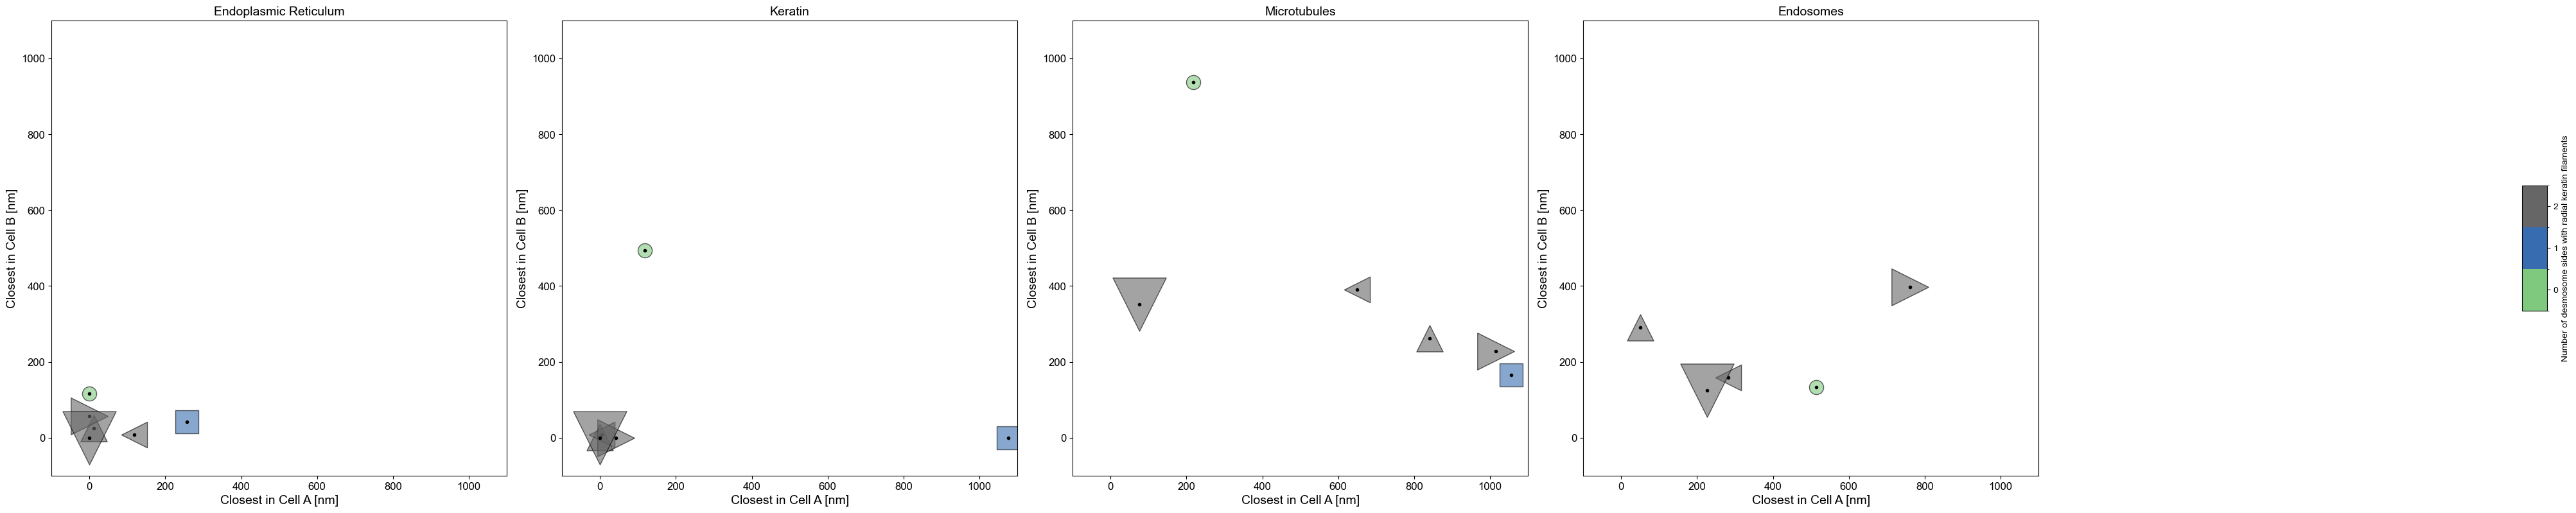

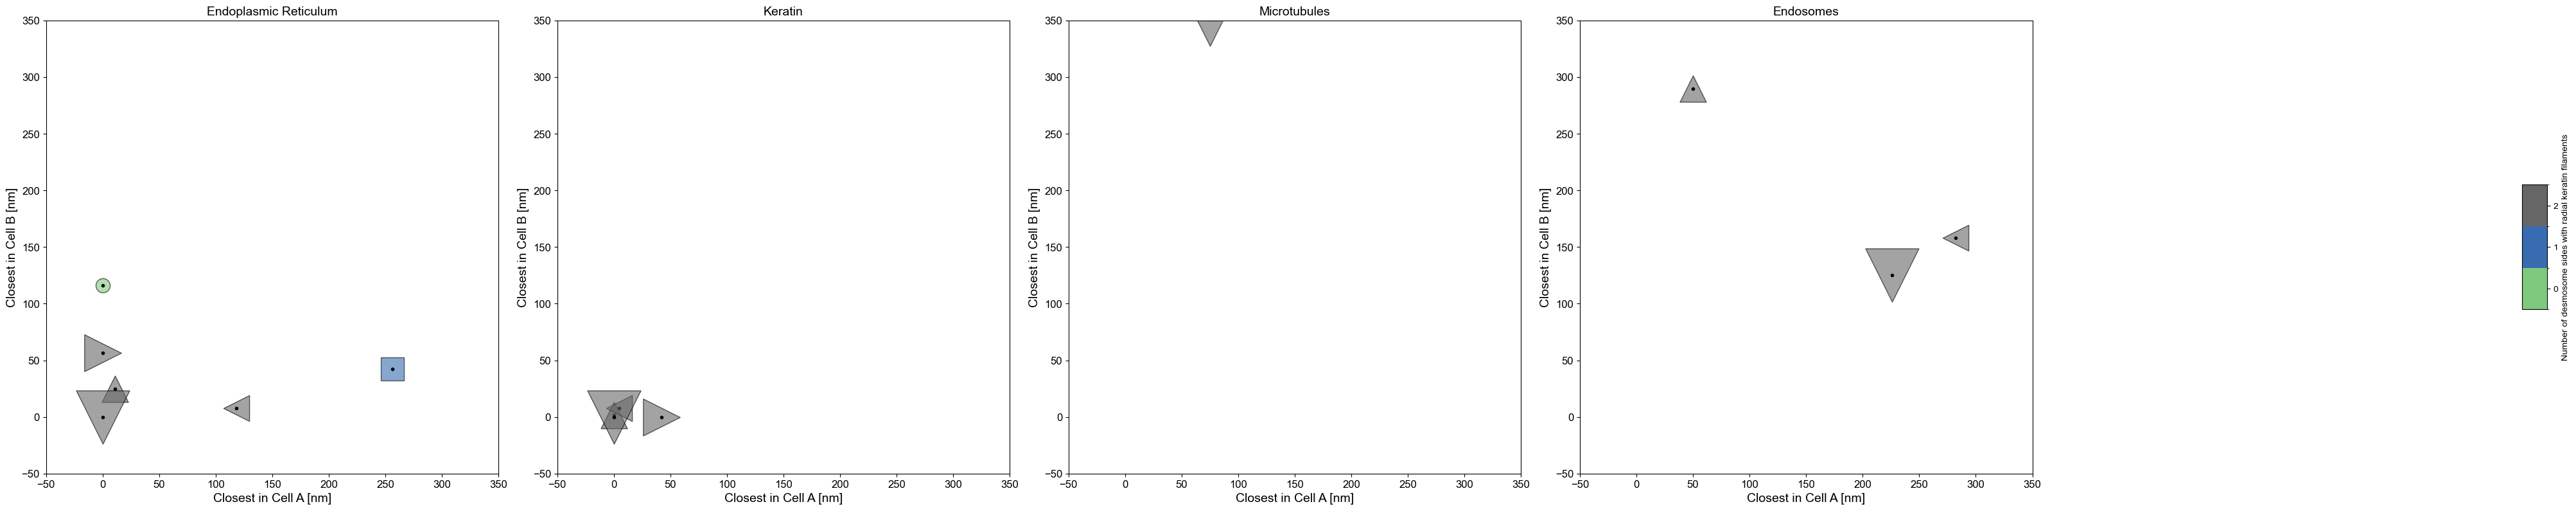

In [6]:
zoomed_out_min = -100
zoomed_out_max = 1100

zoomed_in_min  = -50
zoomed_in_max  = 350

zoomed_out_name  = f"DSM-3_organelle-distances_{zoomed_out_max}nm_square"
zoomed_in_name   = f"DSM-3_organelle-distances_{zoomed_in_max}nm_square"

# With the three chosen colors, Accent's greyscale equivalent looks good
colormap = "Accent" 
plots_dir = "../plots/"

# Zoomed out
createFigure(R_data, L_data,
             df["N-sides-with-radial-keratin-filaments"].values,
             zoomed_out_min, zoomed_out_max, colormap, plots_dir,
             zoomed_out_name)

# Zoomed in
createFigure(R_data, L_data,
             df["N-sides-with-radial-keratin-filaments"].values,
             zoomed_in_min, zoomed_in_max, colormap, plots_dir,
             zoomed_in_name)